In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(filepath_or_buffer='../DATA/cancer_tumor_data_features.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled  = scaler.fit_transform(df)

In [5]:
cov_matrix  = np.cov(X_scaled, rowvar=False)

In [6]:
eig_val, eig_vect = np.linalg.eig(cov_matrix)

In [7]:
# PCA R30 --> R2
keys = np.argsort(eig_val)[::-1][:2]


In [8]:
pca_eigval, pca_eigvect = eig_val[keys], eig_vect[:, keys]
pca_eigvect

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136],
       [ 0.22099499, -0.23107671],
       [ 0.14258969,  0.18611302],
       [ 0.23928535,  0.15189161],
       [ 0.25840048,  0.06016536],
       [ 0.26085376, -0.0347675 ],
       [ 0.13816696,  0.19034877],
       [ 0.06436335,  0.36657547],
       [ 0.20597878, -0.10555215],
       [ 0.01742803,  0.08997968],
       [ 0.21132592, -0.08945723],
       [ 0.20286964, -0.15229263],
       [ 0.01453145,  0.20443045],
       [ 0.17039345,  0.2327159 ],
       [ 0.15358979,  0.19720728],
       [ 0.1834174 ,  0.13032156],
       [ 0.04249842,  0.183848  ],
       [ 0.10256832,  0.28009203],
       [ 0.22799663, -0.21986638],
       [ 0.10446933, -0.0454673 ],
       [ 0.23663968, -0.19987843],
       [ 0.22487053, -0.21935186],
       [ 0.12795256,  0.17230435],
       [ 0.21009588,  0.14359317],
       [ 0.22876753,  0.09796411],
       [ 0.25088597, -0.00825724],
       [ 0.12290456,

In [9]:
principle_components = np.dot(X_scaled, pca_eigvect)

<Axes: >

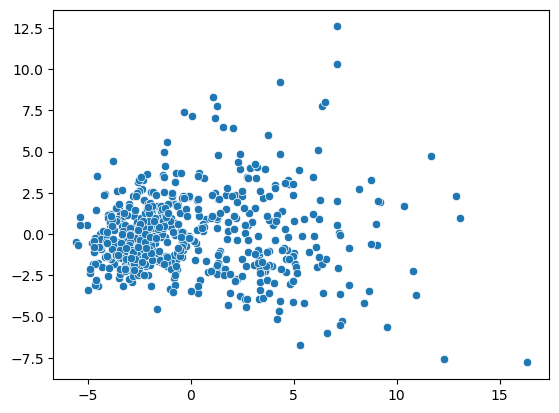

In [10]:
sns.scatterplot(x=principle_components[:,0], y=principle_components[:,1])

In [11]:
from sklearn.datasets import load_breast_cancer

In [12]:
cancer_dict = load_breast_cancer()

<Axes: >

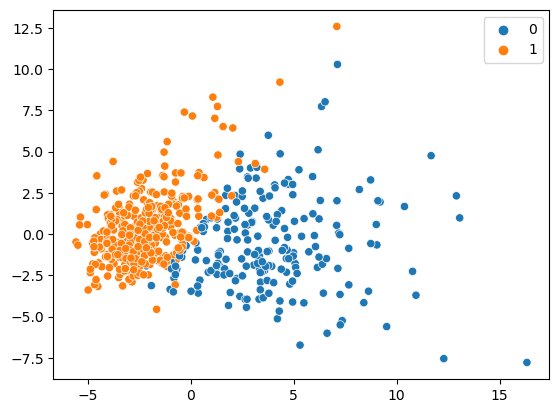

In [13]:
sns.scatterplot(x=principle_components[:,0], y=principle_components[:,1], hue=cancer_dict['target'])